# BITS WILP MTECH DATA SCIENCE 
# Data Mining Assignment Hyd Group 4
# Hyderabad Section: A, Batch 3  


In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

import sklearn.linear_model as skl_lm
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score


import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Pairplot using sns
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [36]:
fileName = "ISP_One_Attrition_Data_file.csv"
df = pd.read_csv(fileName)

In [37]:
df.head(10)

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85
5,1,1601,1280.8,80,4,1,0,31,4,85
6,1,1598,1278.4,81,4,1,0,126,4,85
7,1,1597,1277.6,81,4,1,0,30,4,85
8,1,1604,1283.2,81,4,1,0,49,4,85
9,1,1605,1284.0,81,4,1,0,35,4,85


In [38]:
df.shape

(100000, 10)

# Total Features given in the dataset is 10.

In [39]:
for col in df.columns: 
    print(col) 

active_cust
income
expenditure
months_on_network
Num_complaints
number_plan_changes
relocated
monthly_bill
technical_issues_per_month
Speed_test_result


## active_cust : determines which customer stayed and which one left
## This is the target variable 
## we train the models using Supervised Learning and predict the churn.

In [40]:
df.dtypes

active_cust                     int64
income                          int64
expenditure                   float64
months_on_network               int64
Num_complaints                  int64
number_plan_changes             int64
relocated                       int64
monthly_bill                    int64
technical_issues_per_month      int64
Speed_test_result               int64
dtype: object

# ALL features are numeric. We dont have any categorical data.

In [41]:
# using notnull() function  
df.notnull().sum()

active_cust                   100000
income                        100000
expenditure                   100000
months_on_network             100000
Num_complaints                100000
number_plan_changes           100000
relocated                     100000
monthly_bill                  100000
technical_issues_per_month    100000
Speed_test_result             100000
dtype: int64

In [42]:
# Check for missing values
df.isnull().values.any()

False

# All the values are not null.

In [43]:
df.describe()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
active_cust,100000.0,0.578590,0.493787,0.0,0.00,1.0,1.0,1.0
income,100000.0,1855.279910,2712.385257,1130.0,1674.00,1805.0,1907.0,229821.0
expenditure,100000.0,1409.669662,2174.330870,904.0,1248.65,1358.4,1494.4,183856.8
months_on_network,100000.0,58.402450,18.643736,-20.0,47.00,56.0,70.0,449.0
Num_complaints,100000.0,4.012840,0.285265,3.0,4.00,4.0,4.0,6.0
number_plan_changes,100000.0,1.385410,1.617101,0.0,0.00,1.0,2.0,9.0
relocated,100000.0,0.123480,0.328989,0.0,0.00,0.0,0.0,1.0
monthly_bill,100000.0,95.816450,50.161327,30.0,45.00,87.0,133.0,181.0
technical_issues_per_month,100000.0,3.316730,1.241470,1.0,3.00,4.0,4.0,7.0
Speed_test_result,100000.0,81.668540,9.952554,72.0,78.00,81.0,85.0,332.0


In [45]:
df['active_cust'].value_counts()

1    57859
0    42141
Name: active_cust, dtype: int64

In [46]:
percent100 = df['active_cust'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percent100)

1    57.9%
0    42.1%
Name: active_cust, dtype: object


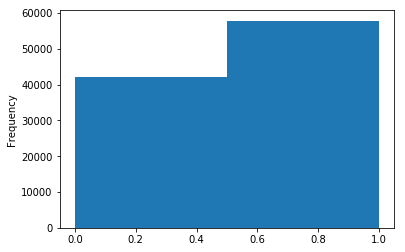

In [47]:
df['active_cust'].plot.hist(bins=2)

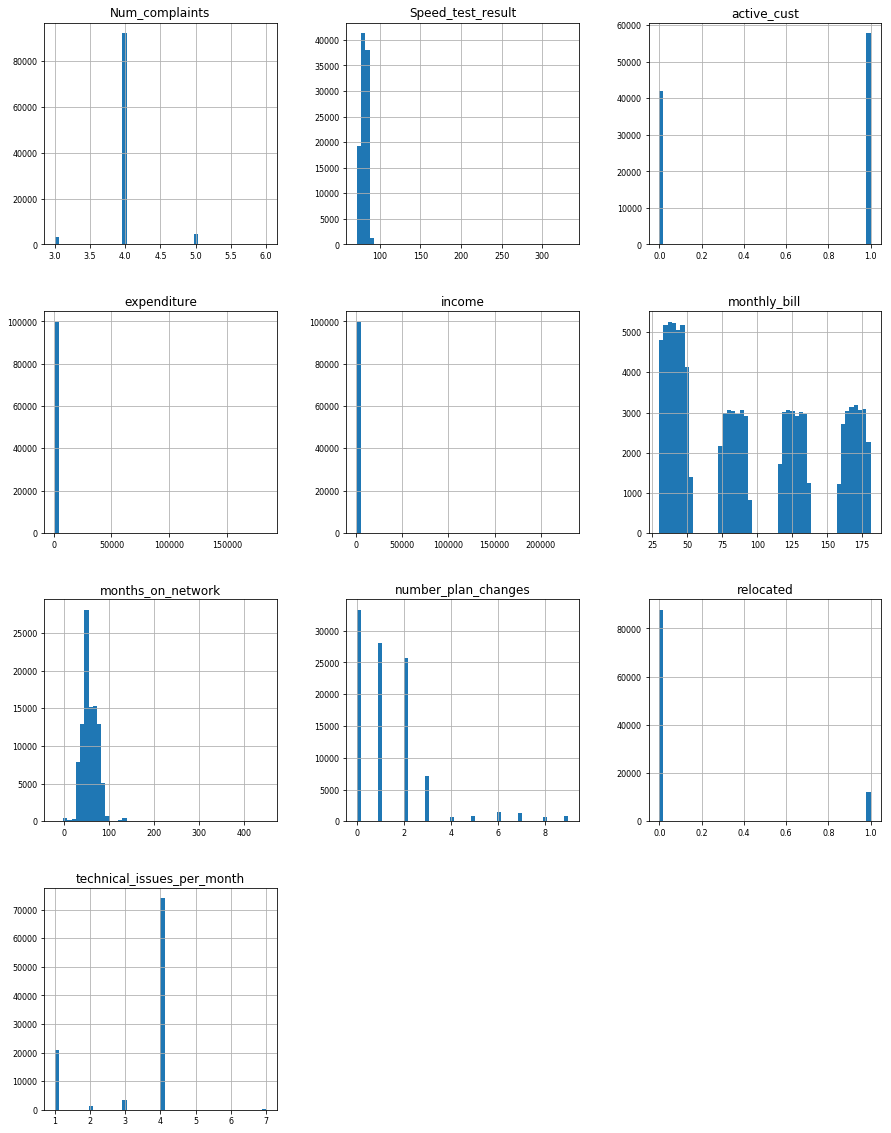

In [49]:
# Plot the distribution for each variable
df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

In [50]:
#### Takes lot of time
#sns.pairplot(df)

In [51]:
df.corr()["active_cust"]

active_cust                   1.000000
income                        0.001201
expenditure                  -0.003939
months_on_network             0.188113
Num_complaints               -0.083481
number_plan_changes          -0.283100
relocated                    -0.381069
monthly_bill                 -0.060156
technical_issues_per_month   -0.260249
Speed_test_result             0.156385
Name: active_cust, dtype: float64

In [52]:
# Check the correlation
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,1.0,0.0012,-0.0039,0.19,-0.083,-0.28,-0.38,-0.06,-0.26,0.16
income,0.0012,1.0,1.0,-0.12,0.0031,-0.0036,0.0019,-0.0047,-0.0026,0.01
expenditure,-0.0039,1.0,1.0,-0.12,0.00049,-0.0078,0.0013,-0.006,-0.0057,0.016
months_on_network,0.19,-0.12,-0.12,1.0,-0.082,0.023,-0.045,0.008,-0.041,0.02
Num_complaints,-0.083,0.0031,0.00049,-0.082,1.0,0.074,0.054,0.005,0.02,0.0041
number_plan_changes,-0.28,-0.0036,-0.0078,0.023,0.074,1.0,0.6,0.025,0.18,-0.0094
relocated,-0.38,0.0019,0.0013,-0.045,0.054,0.6,1.0,0.019,0.11,0.015
monthly_bill,-0.06,-0.0047,-0.006,0.008,0.005,0.025,0.019,1.0,0.13,-0.00035
technical_issues_per_month,-0.26,-0.0026,-0.0057,-0.041,0.02,0.18,0.11,0.13,1.0,-0.055
Speed_test_result,0.16,0.01,0.016,0.02,0.0041,-0.0094,0.015,-0.00035,-0.055,1.0


## Income and Expenditure have 100 % correlation. Hence we can remove one of them safely.

In [55]:
## Dropping the expenditure column
df = df.drop('expenditure',axis=1)

# Normalize all the values to feed in the model

In [56]:
from scipy.stats import zscore
ddf_cust = df.drop('active_cust',axis=1).apply(zscore)

X = ddf_cust.values[:]  ## Features
Y = df['active_cust'].values[:]  ## Target

# Predictor Column Matrix

In [57]:
Y.shape

(100000,)

In [58]:
X.shape

(100000, 8)

# We are reduced to 8 features now.

In [59]:
#sns.pairplot(df, diag_kind='kde') 

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [61]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8454333333333334

In [62]:
# Plot the tree:
#tree.plot_tree(clf.fit(X, Y)) 

In [63]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12754
           1       0.86      0.87      0.87     17246

    accuracy                           0.85     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.85      0.85      0.85     30000



In [64]:
# 1 Logistic Regresssion
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7662333333333333

In [65]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     12754
           1       0.78      0.82      0.80     17246

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000



In [66]:
# 2 Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6276333333333334

In [67]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.88      0.67     12754
           1       0.83      0.44      0.58     17246

    accuracy                           0.63     30000
   macro avg       0.68      0.66      0.62     30000
weighted avg       0.70      0.63      0.62     30000



In [68]:
### 3 SVM Linear Kernel
model1 = svm.SVC(kernel='linear')
#model1.fit(X_train, Y_train)
#Y_pred = model1.predict(X_test)
#accuracy_score(Y_test, Y_pred)

In [69]:
#print(metrics.classification_report(Y_test,Y_pred))

In [70]:
### 4 SVM RBF Kernel
model1 = svm.SVC(kernel='rbf')
#model1.fit(X_train, Y_train)
#Y_pred = model1.predict(X_test)
#accuracy_score(Y_test, Y_pred)

In [71]:
#print(metrics.classification_report(Y_test,Y_pred))